In [1]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics and Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

#Robust Regression
from statsmodels.robust.robust_linear_model import RLM

#Normality Test
from scipy.stats import shapiro,boxcox

#Machine Learning
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
# Load Dataset
data = pd.read_csv("C:/Users/Hp/Downloads/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# Explory Data Analysis(EDA)
#Summary Statistics
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
# Binary Encoding
data["Extracurricular Activities"] = data["Extracurricular Activities"].map({
    "Yes" : 1,
    "No" : 0
})

In [6]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


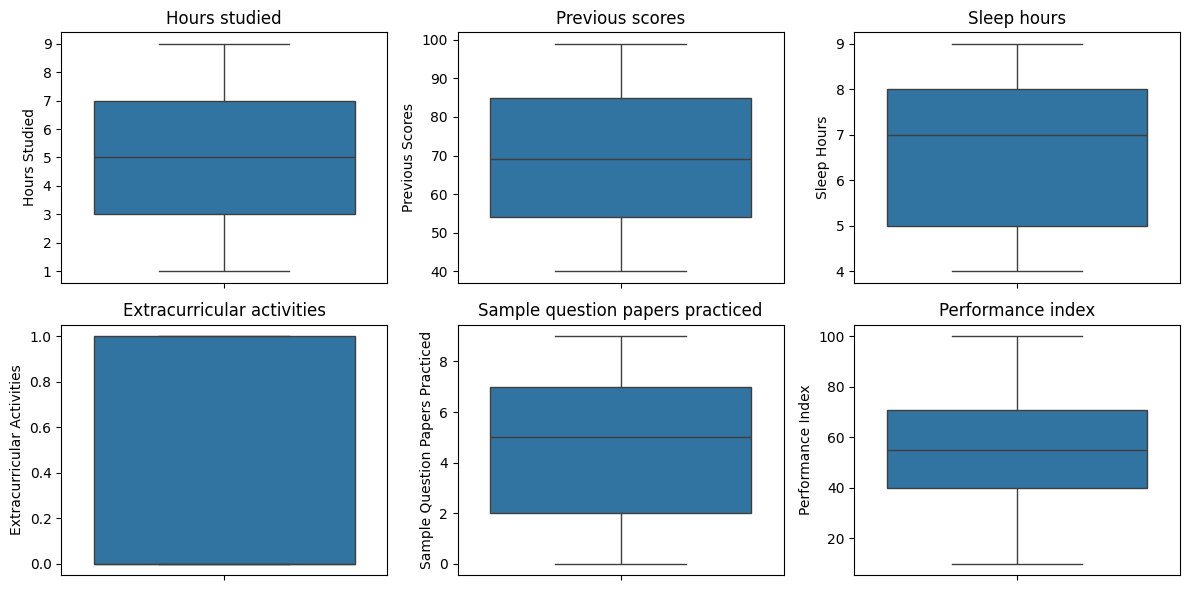

In [7]:
#Boxplot (Outlier Check)

plt.figure(figsize=(12,6))

variables = ["Hours Studied",
             "Previous Scores",
             "Sleep Hours",
             "Extracurricular Activities",
             "Sample Question Papers Practiced",
             "Performance Index"]

for i, var in enumerate(variables,1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[var])
    plt.title(var.capitalize())

plt.tight_layout()
plt.show()

In [8]:
#Fit Linear Regression Model

X = data[["Hours Studied","Previous Scores"
          ,"Sleep Hours","Extracurricular Activities",
            "Sample Question Papers Practiced"]]

y = data["Performance Index"]
X_const = sm.add_constant(X)
lm_model = sm.OLS(y, X_const).fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:45:23   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

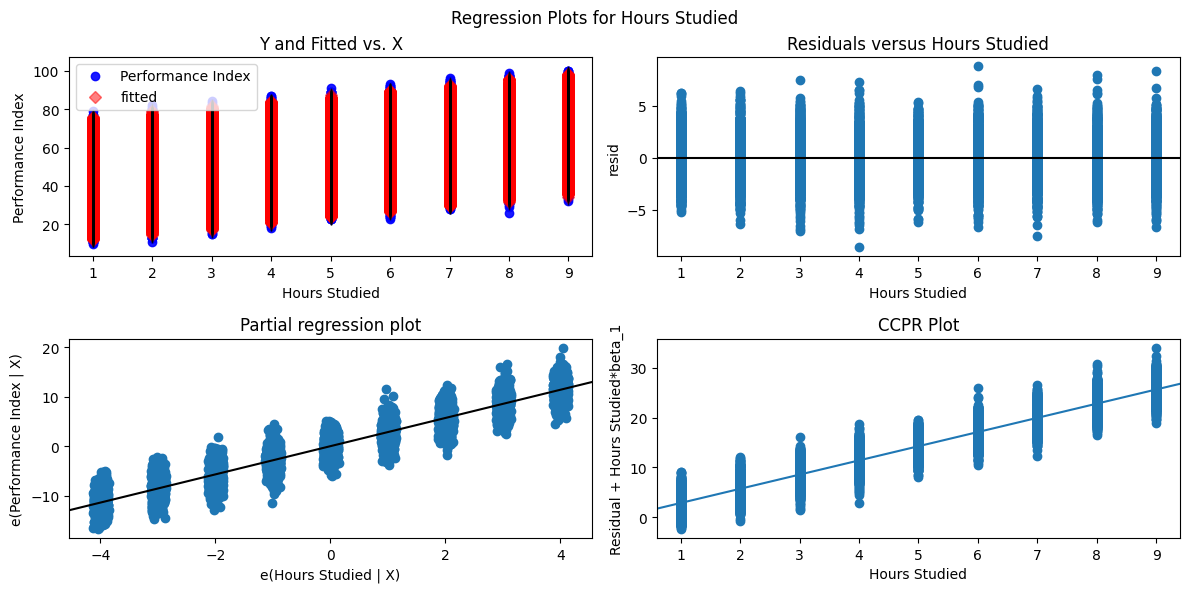

In [9]:
# Linearity & Homoscendasticity(Diagnostic Plots)

fig = plt.figure(figsize=(12,6))
sm.graphics.plot_regress_exog(lm_model, "Hours Studied", fig=fig)
plt.show()

In [10]:
# Normality of Residual

shapiro_test = shapiro(lm_model.resid)
shapiro_test

c:\Users\Hp\AppData\Local\Programs\Python\Python314\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9997762550470203), pvalue=np.float64(0.3862548105391832))

In [11]:
# Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values,i)
    for i in range(X.shape[1])
]

vif_data

,Variable,VIF
0,Hours Studied,4.263244
1,Previous Scores,10.088586
2,Sleep Hours,9.833594
3,Extracurricular Activities,1.928235
4,Sample Question Papers Practiced,3.350481


In [12]:
#Independence of error (Durbin Watson)

durbin_watson(lm_model.resid)

np.float64(2.0009001250688563)

In [13]:
#Breusch-Pagan Test(Homoscendasticity)

bp_test = het_breuschpagan(
    lm_model.resid,
    lm_model.model.exog
)

bp_levels = ["BP Statistic", "F p-value"]
dict(zip(bp_levels,bp_test))

{'BP Statistic': np.float64(2.15942593644991),
 'F p-value': np.float64(0.8266745765790919)}

In [14]:
X_new = data[["Hours Studied","Previous Scores","Sample Question Papers Practiced"]]                         
X_new = sm.add_constant(X_new)

new_model = sm.OLS(y,X_new).fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.478e+05
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:45:24   Log-Likelihood:                -22133.
No. Observations:               10000   AIC:                         4.427e+04
Df Residuals:                    9996   BIC:                         4.430e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [15]:
vif_new = pd.DataFrame()
vif_new["Variable"] = X_new.columns[1:]
vif_new["VIF"] = [
    variance_inflation_factor(X_new.values[:,1:],i)
    for i in range(X_new.shape[1]-1)
]
vif_new

,Variable,VIF
0,Hours Studied,3.949546
1,Previous Scores,5.242684
2,Sample Question Papers Practiced,3.198070


In [16]:
# Ridge Regresion
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)

ridge_coef = pd.DataFrame({
    "variables" : X.columns,
    "Ridge_Coefficient" : ridge.coef_
})
ridge_coef

,variables,Ridge_Coefficient
0,Hours Studied,2.852940
1,Previous Scores,1.018434
2,Sleep Hours,0.480541
3,Extracurricular Activities,0.612652
4,Sample Question Papers Practiced,0.193801


In [17]:
# Robust Regression(Solution 1)
robust_model = RLM(y,X_const).fit()
print(robust_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:      Performance Index   No. Observations:                10000
Model:                            RLM   Df Residuals:                     9994
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 16 Jan 2026                                         
Time:                        19:45:24                                         
No. Iterations:                    13                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [18]:
# Long Transformation(Solution 2)
data["log_perfomance"] = np.log(data["Performance Index"])

lm_log = sm.OLS(
    data["log_perfomance"],
    sm.add_constant(X)
).fit()

print(lm_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_perfomance   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 2.971e+04
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:45:24   Log-Likelihood:                 8858.0
No. Observations:               10000   AIC:                        -1.770e+04
Df Residuals:                    9994   BIC:                        -1.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

c:\Users\Hp\AppData\Local\Programs\Python\Python314\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


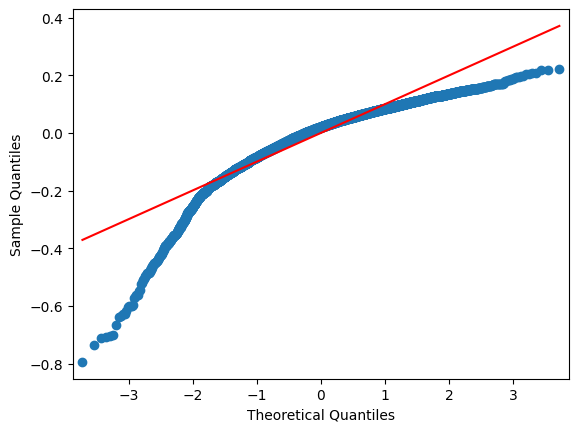

In [19]:
# Normality After log Transform

shapiro(lm_log.resid)

sm.qqplot(lm_log.resid, line = "s")
plt.show()

In [20]:
# Box-Cox Transformation
perfomance_bc,lambda_opt = boxcox(data["Performance Index"])
lambda_opt

data["perfomance_bc"] = perfomance_bc

lm_bc = sm.OLS(
    data["perfomance_bc"],
    sm.add_constant(X)
).fit()
print(lm_bc.summary())

                            OLS Regression Results                            
Dep. Variable:          perfomance_bc   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.608e+05
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:45:24   Log-Likelihood:                -16071.
No. Observations:               10000   AIC:                         3.215e+04
Df Residuals:                    9994   BIC:                         3.220e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

c:\Users\Hp\AppData\Local\Programs\Python\Python314\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


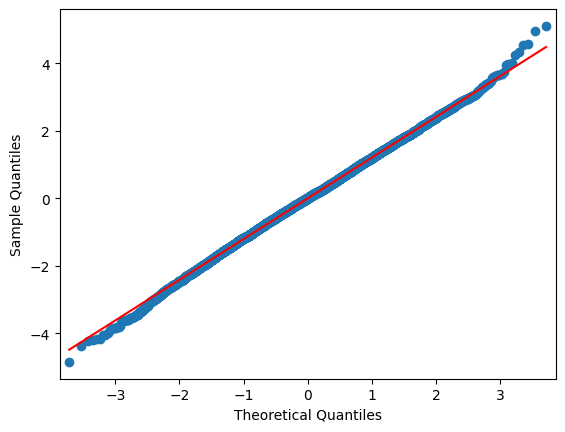

In [21]:
shapiro(lm_bc.resid)

sm.qqplot(lm_bc.resid, line = "s")
plt.show()

In [22]:
# Train-Test Split(Maxhine learning Setup)

X_train,X_test,y_train,y_test = train_test_split(
    X,y,train_size=0.3, random_state= 320
)

In [23]:
# ML Linear Regression

ml_model = LinearRegression()
ml_model.fit(X_train,y_train)

y_pred = ml_model.predict(X_test)

In [24]:
# Model Evalution Mateics
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
mape = np.mean(np.abs((y_test-y_pred)/y_test))**100

mse, rmse, mae, mape

(4.17011837972278,
 np.float64(2.0420867708603323),
 1.620964263262266,
 np.float64(9.173173936271967e-147))

In [25]:
# K-Fold Cross-Validation(10-Fold)

kf = KFold(n_splits=10 , shuffle= True, random_state= 320)

cv_rmse = np.sqrt(
    -cross_val_score(ml_model,X,y,
    cv = kf,
    scoring="neg_mean_squared_error"
    )
    )
cv_rmse

array([2.09847758, 1.97891794, 2.02173587, 2.04268844, 2.06570129,
       2.02463868, 2.04908651, 1.95937277, 2.09572809, 2.04865087])

In [26]:
cv_rmse.mean()

np.float64(2.038499804582354)

In [27]:
# Ridge Regression 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize Predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled,y_train)

# Predict on Test Data
y_pred = ridge.predict(X_test_scaled)

In [28]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(2.042219530132133)

In [29]:
# Ridge Coefficient
ridge_coef =pd.DataFrame({
    "Variable" : X.columns,
    "Ridge_Coefficent" : ridge.coef_
})

ridge_coef

,Variable,Ridge_Coefficent
0,Hours Studied,7.234065
1,Previous Scores,17.661203
2,Sleep Hours,0.838285
3,Extracurricular Activities,0.271432
4,Sample Question Papers Practiced,0.542129
